# Water Density

© 2024 Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/porous_media/blob/main/notebooks/water_density.ipynb).



$$
\rho_\mathrm{w} = \frac{M_\mathrm{w}}{V_\mathrm{w}} = f(P, T, W)
$$

- $P$ → Pressure
- $T$ → Temperature
- $W$ → Solute concentration

The solution of $\rho_\mathrm{w}$ can be approximated linearly for a limited range of temperatures:

$$
\rho_w(P, T, W) = \rho_\mathrm{w}^0 \left( 1 + \beta \Delta P - \alpha \Delta T + \gamma \Delta W \right)
$$

or exponentially:

$$
\rho_w(P, T, W) = \rho_\mathrm{w}^0 \exp \left(\beta \Delta P - \alpha \Delta T + \gamma \Delta W \right)
$$
where

- $\beta$ → Compressibility coefficient, describing how density changes with pressure
- $\alpha$ → Thermal expansion coefficient, describing how density changes with temperature
- $\gamma$ → Solute expansion coefficient, describing how density changes with solute concentration, and,
- $\rho_\mathrm{w}^0$ → reference density of water at standard conditions (usually at atmospheric pressure, 4°C, and no solutes).

## Required modules and global setup for plots

In [1]:
import ast
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import widgets as wgt
from IPython import get_ipython
from IPython.display import display

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab. Installing the required modules...')
    from subprocess import run
    run('pip install ipympl', shell=True);
    from google.colab import output
    output.enable_custom_widget_manager()
    
# Figures setup
%matplotlib widget
plt.style.use("default")
mpl.rcParams.update(
    {
        'figure.constrained_layout.use': True,
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)

def display_fig(fig, static_fig=False):
    if static_fig and 'google.colab' in str(get_ipython()):
        display(fig)
    else:
        plt.show()
        display(wgt.HTML(  # To not display the window title
            '<style> div.jupyter-widgets.widget-label {display: none;} </style>'))
    plt.close()

tol_cols = ['#004488', '#DDAA33', '#BB5566']

## Functions

In [2]:
def water_density(ρ_0=1000, P_0=100, P=100, β=5e-7, T_0=4, T=4, α=-3.4e-4, W_0=0, W=0, γ=0.8, linear=True): 
    '''
    ρ: density [kg/m³]
    β: compressibility coefficient [1/kPa]
    α: thermal expansion coefficient [1/K]
    γ: Solute expansion coefficient [kg/m3 per g/kg]
    '''
    if not linear:
        T_vec = np.array([0.1, 1, 4, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 140, 160, 180, 200, 220, 240, 260])  # [°C]
        α_vec = -1 * np.array([-0.68, -0.50, 0.003, 0.88, 2.07, 3.03, 3.84, 4.54, 5.16, 5.71, 6.21, 6.66, 7.03, 8.01, 8.60, 9.75, 11.0, 12.3, 13.9, 16.0, 18.6, 22.1]) * 1e-4  # [1/°K]
        # α_interporlator = sp.interpolate.CubicSpline(T_vec, α_vec, bc_type='natural')
        # α = -1*α_interporlator(T)
        α = np.interp(T, T_vec, α_vec)
    ΔP = P - P_0 
    ΔT = T - T_0
    ΔW = (W - W_0) * 1e-3
    if linear:
        ρ = ρ_0 * (1 + β * ΔP + α * ΔT + γ * ΔW)
    else:
        ρ = ρ_0 * np.exp(β * ΔP + α * ΔT + γ * ΔW)
    return ρ

## Variation of water density with temperature

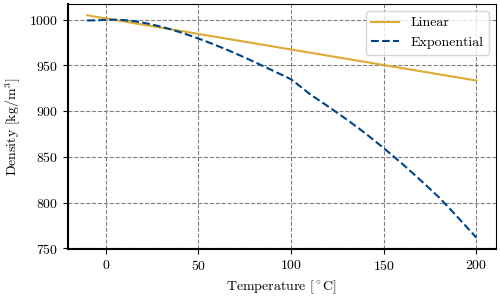

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [3]:
# Temperature range
T = np.linspace(-10, 200, 500)  # [°C]
α = -3.4e-4  # Thermal expansion coefficient [1/°C]

ρ_lin = water_density(T=T, α=α, linear=True)
ρ_exp = water_density(T=T, α=α, linear=False)

# plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(T, ρ_lin, label='Linear', c=tol_cols[1])
ax.plot(T, ρ_exp, label='Exponential', c=tol_cols[0], ls='--')
ax.set(xlabel='Temperature [$^\circ$C]', ylabel='Density [kg/m$^3$]')
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.ticklabel_format(useOffset=False)
ax.legend()
ax.grid(True, ls='--', c='0.5')
display_fig(fig, static_fig=True)


## Variation of water density with pressure

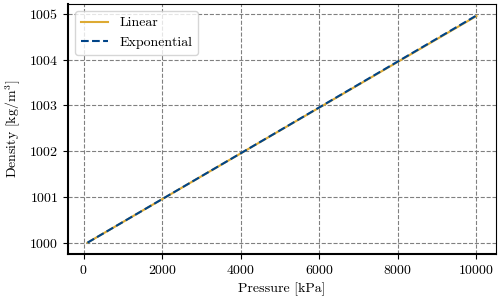

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [4]:
P = np.linspace(100, 10000, 500)  # Pressure range (up to ~1 km of water column) [kPa]
β = 5e-7  # Compressibility coefficient [1/kPa]

ρ_lin = water_density(P=P, β=β, linear=True)
ρ_exp = water_density(P=P, β=β, linear=False)

# plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(P, ρ_lin, label='Linear', c=tol_cols[1])
ax.plot(P, ρ_exp, label='Exponential', c=tol_cols[0], ls='--')
ax.set(xlabel='Pressure [kPa]', ylabel='Density [kg/m$^3$]')
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.ticklabel_format(useOffset=False)
ax.legend()
ax.grid(True, ls='--', c='0.5')
display_fig(fig, static_fig=True)

## Variation of water density with solute concentration 

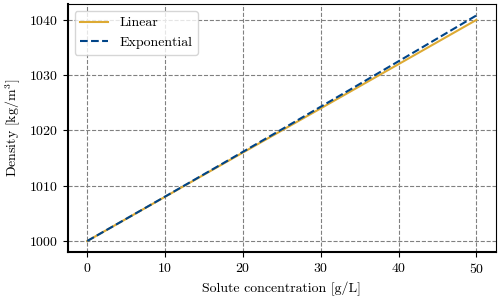

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [5]:
W = np.linspace(0, 50, 500)  # Solute concentration range [g/L]
γ = 0.8  # Solute expansion coefficient [kg/m3 per g/kg]

ρ_lin = water_density(W=W, γ=γ, linear=True)
ρ_exp = water_density(W=W, γ=γ, linear=False)

# plot
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(W, ρ_lin, label='Linear', c=tol_cols[1])
ax.plot(W, ρ_exp, label='Exponential', c=tol_cols[0], ls='--')
ax.set(xlabel='Solute concentration [g/L]', ylabel='Density [kg/m$^3$]')
ax.spines[["left", "bottom"]].set_linewidth(1.5)
ax.ticklabel_format(useOffset=False)
ax.legend()
ax.grid(True, ls='--', c='0.5')
display_fig(fig, static_fig=True)
